In [1]:
print('''Project Goal:- To detect and read house number signs in street view images''')

Project Goal:- To detect and read house number signs in street view images


# Dataset Overview:
#  10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
    
# comprises over 600,000 labeled characters. Out of which 
# 73257 digits for training, 26032 digits for testing, and 531131 additional.
    

In [2]:
import tensorflow as tf
tf.reset_default_graph()
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# As I am unable to read teh H5f file due to OSError . So I have downloaded the file directly from "UFLD.standord.Edu/housenumbers" site. There are three .mat files 1. train_32x32,2.test_32x32,3.extra_32x32.

In [3]:
# Reading train data by downloading from "http://ufldl.stanford.edu/housenumbers/"
train_data = sio.loadmat('train_32x32.mat')

# access to the dict
x_train = train_data['X']
y_train = train_data['y']

# Reading test data by downloading from "http://ufldl.stanford.edu/housenumbers/"
test_data = sio.loadmat('test_32x32.mat')

# access to the dict
x_test = test_data['X']
y_test = test_data['y']


In [4]:
# As Zero has level 10, hence replacing 10 with zero

In [5]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [6]:
print(x_train.shape,y_train.shape) # printng shape of train images 
print(x_test.shape,y_test.shape) # printng shape of test images

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


# Data Preprocessing

In [7]:
image_size = 32  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def immage_gray(image):
    '''Normalize images'''
    image = image.astype(float)
    # Use the Conversion Method in This Paper:
    # [http://www.eyemaginary.com/Rendering/TurnColorsGray.pdf]
    image_gray = np.dot(image, [[0.2989],[0.5870],[0.1140]])
    return image_gray



In [8]:
# Preparing test data
testx = x_test.transpose((3,0,1,2))
testy = y_test[:,0]
print("Test datasets are:-\n")
print(testx.shape, testy.shape)

Test datasets are:-

(26032, 32, 32, 3) (26032,)


In [9]:
testx_final = immage_gray(testx)[:,:,:,0]
#validx_final = immage_gray(validx)[:,:,:,0]

#print(trainx_final.shape, trainy.shape)
print(testx_final.shape,testy.shape)
#print(validx_final.shape, validy.shape)

(26032, 32, 32) (26032,)


In [10]:
# Preparing training data
trainx = x_train.transpose((3,0,1,2))
trainy = y_train[:,0]
print("Train datasets are:-\n")
print(trainx.shape, trainy.shape)

Train datasets are:-

(73257, 32, 32, 3) (73257,)


In [11]:
trainx_final = immage_gray(trainx)[:,:,:,0]
print(trainx_final.shape,trainy.shape)

(73257, 32, 32) (73257,)


In [12]:
print(trainx_final.shape,trainy.shape)

(73257, 32, 32) (73257,)


In [13]:
y_train.view()

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

# The SVHN classification dataset contains 32x32
# images with 3 color channels

# Normalize the inputs for X_train, X_test and X_val

In [14]:
# normalizing the independent data.
image_size = 32  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
trainx, testx = trainx / 255.0, testx / 255.0

# reshaping the data from 2D matrix into 1D vectors
trainx = trainx_final.reshape(73257, 1024)
testx = testx_final.reshape(26032, 1024)


# Checking the column length

print(f"Column length of train data -\n{trainx.shape[1]}")
print (f"Column length of test data -\n{testx.shape[1]}")

Column length of train data -
1024
Column length of test data -
1024


In [ ]:
# Let us consider of extra data for validation

In [ ]:
# Reading extra data by downloading  from "http://ufldl.stanford.edu/housenumbers/"
extra_data = sio.loadmat('extra_32x32.mat')

# access to the dict
x_extra = extra_data['X']
y_extra = extra_data['y']
y_extra[y_extra == 10] = 0
print(x_extra.shape,y_extra.shape) # printng shape of extra images
extrax = x_extra.transpose((3,0,1,2))
extrax=extrax[:,:,:,0]
extray = y_extra[:,0]
print("Extra datasets are:-\n")
print(extrax.shape, extray.shape)
# reshaping the validation data same as size of test data from extrax dataset into 1D vectors
validx = extrax.reshape(531131, 1024)
print(f"Column length of valid data -\n{validx.shape[1]}")
print(validx.shape)


In [ ]:
validdata=validx
validx, X_test, validy, y_test = train_test_split(validdata,extray,test_size = 0.95, random_state = 7)

In [15]:
print(f"trainx shape is-{trainx.shape}")
print(f"trainy shape is-{trainy.shape}")
print(f"testx shape is-{testx.shape}")
print(f"testy shape is-{testy.shape}")
#print(f"validx shape is-{validx.shape}")
#print(f"validy shape is-{validy.shape}")


trainx shape is-(73257, 1024)
trainy shape is-(73257,)
testx shape is-(26032, 1024)
testy shape is-(26032,)


# Visualize the first 10 images in X_train and the corresponding Y_train labels

<Figure size 720x720 with 0 Axes>

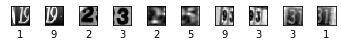

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.show()
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainx_final[i], cmap=plt.cm.binary)
    plt.xlabel(trainy[i])

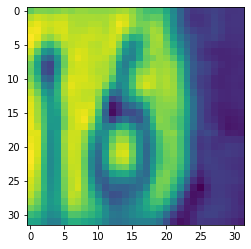

6


In [30]:
# showing two samples form trin data.
image_ind = 21
plt.imshow(trainx_final[image_ind])
plt.show()
print(trainy[image_ind])

In [15]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(10) # used to reproducibility of results.


# Convert class vectors(Dependent data) to binary class matrices (Converting to One Hot vector)

In [16]:

num_classes = 10
trainy = tf.keras.utils.to_categorical(trainy, num_classes)
testy = tf.keras.utils.to_categorical(testy, num_classes)


In [17]:
#validy = tf.keras.utils.to_categorical(validy, num_classes)

In [18]:
print(trainy[0])
print(testy[0])
#print(validy[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
print(f'We have {trainx.shape[0]} train samples')
print(f'We have {testx.shape[0]} test samples')

We have 73257 train samples
We have 26032 test samples


# Defining hyper parameters

In [44]:

epochs=30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
# Defining sigmoid optimizer with default learning rate.
sgd = tf.keras.optimizers.SGD()
# Defining sigmoid optimizer with non_default learning rate.
sgd_param=tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions

In [37]:
print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [52]:
input_shape = trainx.shape[1]

In [53]:
input_shape

1024

In [40]:
# build the model
# As we have 32*32 matrix , so we need to create the layer for  the model by a vector instead of matrix
# by reshaping 2d to 1d(32*32=1024= trainx.shape[1])
input_shape = trainx.shape[1]

lr_model = tf.keras.models.Sequential()
# creating input layer with relu activation, kernel initializer=uniform and then normalizing the data
lr_model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='uniform',input_dim = input_shape))
# Normalizing the data by using Batchnormalization()
lr_model.add(tf.keras.layers.BatchNormalization())


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
# Creating hidden layers with relu activation function and Kernel initialzier=uniform 
# creating output layer with softmax to convert the output into probability with kernel initializer=uniform.

In [41]:
# 1st Hidden layer 
lr_model.add(tf.keras.layers.Dense(80,activation=tf.nn.relu, kernel_initializer='uniform'))

lr_model.add(tf.keras.layers.BatchNormalization())

# 2nd Hidden layer
lr_model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu, kernel_initializer='uniform'))

# 3rd Hidden layer
lr_model.add(tf.keras.layers.Dense(40,activation=tf.nn.relu, kernel_initializer='uniform'))

# output layer
lr_model.add(tf.keras.layers.Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

#Compile the model using sgd
#model.compile(optimizer="sgd_optimizer", loss='categorical_crossentropy', metrics=['accuracy'])
#Compile the model using adam
#lr_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
lr_model.compile(optimizer=sgd_param, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
tf.keras.backend.clear_session()

In [43]:
lr_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4

In [45]:
trainx.shape

(73257, 1024)

In [46]:
%%time
# Fit the model
batch_size = int(input_shape/50)

lr_model_history = lr_model.fit(trainx, trainy,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testx, testy))

Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73257/73257 [==============================] - 169s 2ms/sample - loss: 2.0164 - acc: 0.2651 - val_loss: 2.4692 - val_acc: 0.2009
Epoch 2/30
73257/73257 [==============================] - 11s 150us/sample - loss: 1.8682 - acc: 0.3232 - val_loss: 2.2587 - val_acc: 0.3723
Epoch 3/30
73257/73257 [==============================] - 11s 147us/sample - loss: 1.7373 - acc: 0.3819 - val_loss: 2.0705 - val_acc: 0.4403
Epoch 4/30
73257/73257 [==============================] - 11s 149us/sample - loss: 1.6365 - acc: 0.4277 - val_loss: 2.0512 - val_acc: 0.4153
Epoch 5/30
73257/73257 [==============================] - 11s 148us/sample - loss: 1.6039 - acc: 0.4446 - val_loss: 2.0454 - val_acc: 0.4672
Epoch 6/30
73257/73257 [==============================] - 11s 157us/sample - loss: 1.5623 - acc: 0.4607 - val_loss: 1.9581 - val_acc: 0.4924
Epoch 7/30
73257/73257 [==============================] - 11s 153us/sample - loss: 1.5104 - acc: 0.4790 -

In [ ]:
tf.keras.backend.clear_session()

In [51]:
input_shap

32

In [72]:
# build another model with same optimizer sgd but with lr 0.01
input_shape = trainx.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(600, activation=tf.nn.relu, kernel_initializer='uniform',input_dim = input_shape))
# Normalizing the data by using Batchnormalization()
model.add(tf.keras.layers.BatchNormalization())
# 1st Hidden layer 
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu, kernel_initializer='uniform'))

model.add(tf.keras.layers.BatchNormalization())

# 2nd Hidden layer
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu, kernel_initializer='uniform'))

# 3rd Hidden layer
model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu, kernel_initializer='uniform'))

# output layer
model.add(tf.keras.layers.Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))



#rms = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
sgd_param=tf.keras.optimizers.SGD(lr=0.01, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd_param,
              metrics=['acc'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               615000    
_________________________________________________________________
batch_normalization (BatchNo (None, 600)               2400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               120200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                6

In [74]:
%%time
# Fit the model
batch_size = int(input_shape/25)

lr_model_history = model.fit(trainx, trainy,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testx, testy))

Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73257/73257 [==============================] - 26s 360us/sample - loss: 2.0071 - acc: 0.2668 - val_loss: 2.0497 - val_acc: 0.2844
Epoch 2/30
73257/73257 [==============================] - 26s 354us/sample - loss: 1.5667 - acc: 0.4521 - val_loss: 1.6026 - val_acc: 0.4811
Epoch 3/30
73257/73257 [==============================] - 26s 349us/sample - loss: 1.3696 - acc: 0.5343 - val_loss: 1.6127 - val_acc: 0.5080
Epoch 4/30
73257/73257 [==============================] - 26s 349us/sample - loss: 1.2435 - acc: 0.5767 - val_loss: 1.5018 - val_acc: 0.5658
Epoch 5/30
73257/73257 [==============================] - 26s 357us/sample - loss: 1.1523 - acc: 0.6173 - val_loss: 1.4157 - val_acc: 0.6189
Epoch 6/30
73257/73257 [==============================] - 26s 349us/sample - loss: 1.0837 - acc: 0.6521 - val_loss: 1.3749 - val_acc: 0.6381
Epoch 7/30
73257/73257 [==============================] - 25s 345us/sample - loss: 1.0235 - acc: 0.6768 

# By increasing the batch size from(50% of inputsize to 25% of input size)and decreasing the learning rate from 0.01 to 0.001,
# for 30 epoch, training loss has been decreased from 1.23 to 0.66 and accuracy on training set increased from 59 to 79% simillary
# on test set val_loss has been decreased from 2.8 to 1.28 and accuracy increased from 60% 77%.

In [ ]:
# ploting the score through model.eavluate

Test loss: 1.2532615515998191
Test accuracy: 0.77377844


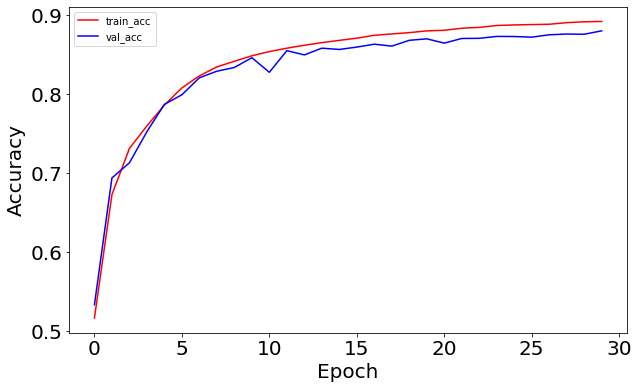

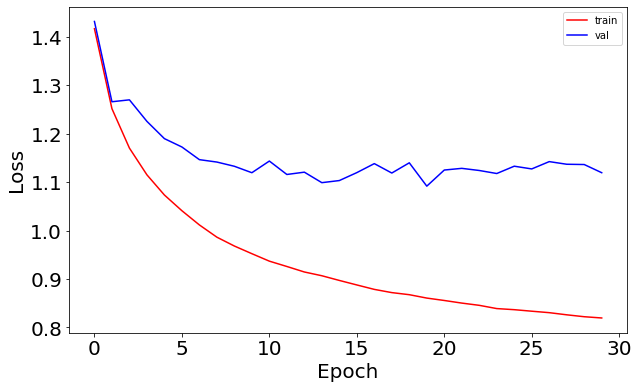

In [76]:
score = model.evaluate(testx, testy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train_acc')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# There is sudden change in accuracy after Epoch no 10 but the validation loss is very high.

In [21]:
tf.keras.backend.clear_session()

In [22]:
# Create a function for the model.
# Let us hyper tune the model by using grid seachcv


In [24]:
epochs=10
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
num_classes=10
sgd_param=tf.keras.optimizers.SGD()
def create_model(optimizer='sgd_param', init='glorot_uniform',learn_rate=0.001, momentum=0):
    input_shape = trainx.shape[1]
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(600, activation=tf.nn.relu, kernel_initializer=init,input_dim = input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu, kernel_initializer=init))
    model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu, kernel_initializer=init))
    model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu, kernel_initializer=init))
    model.add(tf.keras.layers.Dense(num_classes, kernel_initializer=init, activation=tf.nn.softmax))
    
    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
SGD=tf.keras.optimizers.SGD()
RMSprop=tf.keras.optimizers.RMSprop()
Adam=tf.keras.optimizers.Adam()

In [27]:

%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
import numpy as np
np.random.seed(seed)
input_shape = trainx.shape[1]
batch1=int(input_shape/25)
batch2=int(input_shape/15)
batch3=int(input_shape/10)
# create the sklearn model for the network
model_init_batch_epoch_CV = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
#init_mode = init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero','glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
init_mode = ['uniform', 'glorot_uniform',]
#batches = [batch1,batch2,batch3]
batches = [batch3]
epochs = [10]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] 
optimizer = ['RMSprop','Adam'] 
learn_rate = [0.002] # Tuning Learning rate.
momentum = [0.6] # Tunning momentum
# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode,optimizer=optimizer,learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)


Wall time: 314 ms


In [28]:
%%time
grid_result = grid.fit(trainx, trainy)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
48838/48838 [==============================] - 16s 321us/sample - loss: 1.8355 - acc: 0.3382
Epoch 2/10
48838/48838 [==============================] - 13s 259us/sample - loss: 1.4628 - acc: 0.4992
Epoch 3/10
48838/48838 [==============================] - 12s 244us/sample - loss: 1.2395 - acc: 0.5980
Epoch 4/10
48838/48838 [==============================] - 13s 258us/sample - loss: 1.1094 - acc: 0.6480
Epoch 5/10
48838/48838 [==============================] - 13s 257us/sample - loss: 1.0065 - acc: 0.6815
Epoch 6/10
48838/48838 [==============================] - 12s 256us/sample - loss: 0.9179 - acc: 0.7110
Epoch 7/10
48838/48838 [==============================] - 13s 258us/sample - loss: 0.8358 - acc: 0.7378
Epoch 8/10
48838/48838 [==============================] - 12s 247us/sample - loss: 0.7728 - acc: 0.7592
Epoch 9/10
48838/48838 [==========================

48838/48838 [==============================] - 13s 275us/sample - loss: 1.1223 - acc: 0.6465: 5s - loss: 1.143 -
Epoch 3/10
48838/48838 [==============================] - 13s 275us/sample - loss: 0.9937 - acc: 0.6908 - loss: 1.011
Epoch 4/10
48838/48838 [==============================] - 14s 295us/sample - loss: 0.9066 - acc: 0.7184
Epoch 5/10
48838/48838 [==============================] - ETA: 0s - loss: 0.8431 - acc: 0.739 - 13s 274us/sample - loss: 0.8432 - acc: 0.7392
Epoch 6/10
48838/48838 [==============================] - 14s 295us/sample - loss: 0.7846 - acc: 0.7570
Epoch 7/10
48838/48838 [==============================] - 13s 273us/sample - loss: 0.7470 - acc: 0.7688
Epoch 8/10
48838/48838 [==============================] - 14s 294us/sample - loss: 0.7188 - acc: 0.7772
Epoch 9/10
48838/48838 [==============================] - 13s 258us/sample - loss: 0.6940 - acc: 0.7844
Epoch 10/10
24419/24419 [==============================] - 2s 81us/sample - loss: 0.8832 - acc: 0.7477
Epoc

In [29]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.7435 using {'batch_size': 102, 'epochs': 10, 'init': 'glorot_uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}
mean=0.6605, std=0.01923 using {'batch_size': 102, 'epochs': 10, 'init': 'uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'RMSprop'}
mean=0.7344, std=0.006945 using {'batch_size': 102, 'epochs': 10, 'init': 'uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}
mean=0.6747, std=0.09158 using {'batch_size': 102, 'epochs': 10, 'init': 'glorot_uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'RMSprop'}
mean=0.7435, std=0.03658 using {'batch_size': 102, 'epochs': 10, 'init': 'glorot_uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}


In [30]:

%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
import numpy as np
np.random.seed(seed)
input_shape = trainx.shape[1]
batch1=int(input_shape/25)
batch2=int(input_shape/15)
batch3=int(input_shape/10)
# create the sklearn model for the network
model_init_batch_epoch_CV = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
#init_mode = init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero','glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
init_mode = ['uniform', 'glorot_uniform', 'he_uniform']
#batches = [batch1,batch2,batch3]
batches = [batch1]
epochs = [20]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] 
optimizer = ['Adam'] 
learn_rate = [0.002] # Tuning Learning rate.
momentum = [0.6] # Tunning momentum
# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode,optimizer=optimizer,learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)


Wall time: 37.7 ms


# Let us see the result by changing batchsize and no of epochs with three different intialization mode and with same learning rate 0.002 and momentum 0.6

In [31]:
%%time
grid_result = grid.fit(trainx, trainy)

Epoch 1/20
48838/48838 [==============================] - 15s 314us/sample - loss: 1.7294 - acc: 0.3859
Epoch 2/20
48838/48838 [==============================] - 16s 321us/sample - loss: 1.3035 - acc: 0.5667
Epoch 3/20
48838/48838 [==============================] - 17s 351us/sample - loss: 1.1023 - acc: 0.6470 - loss: 1.1031 - acc: 0
Epoch 4/20
48838/48838 [==============================] - 17s 357us/sample - loss: 0.9847 - acc: 0.6886
Epoch 5/20
48838/48838 [==============================] - 17s 349us/sample - loss: 0.9258 - acc: 0.7062
Epoch 6/20
48838/48838 [==============================] - 16s 323us/sample - loss: 0.8738 - acc: 0.7229
Epoch 7/20
48838/48838 [==============================] - 16s 335us/sample - loss: 0.8279 - acc: 0.7370
Epoch 8/20
48838/48838 [==============================] - 15s 310us/sample - loss: 0.7856 - acc: 0.7508
Epoch 9/20
48838/48838 [==============================] - 16s 328us/sample - loss: 0.7566 - acc: 0.7602 - loss: 0.7567 - acc: 0.7
Epoch 10/20
48

48838/48838 [==============================] - 15s 308us/sample - loss: 0.6271 - acc: 0.8008
Epoch 15/20
48838/48838 [==============================] - 16s 324us/sample - loss: 0.6177 - acc: 0.8050
Epoch 16/20
48838/48838 [==============================] - 16s 322us/sample - loss: 0.6046 - acc: 0.8077
Epoch 17/20
48838/48838 [==============================] - 16s 331us/sample - loss: 0.5995 - acc: 0.8109 - l
Epoch 18/20
48838/48838 [==============================] - 16s 318us/sample - loss: 0.5900 - acc: 0.8116
Epoch 19/20
48838/48838 [==============================] - 16s 327us/sample - loss: 0.5770 - acc: 0.8160
Epoch 20/20
24419/24419 [==============================] - 3s 129us/sample - loss: 0.8209 - acc: 0.7555
Epoch 1/20
48838/48838 [==============================] - 16s 331us/sample - loss: 1.4101 - acc: 0.5328
Epoch 2/20
48838/48838 [==============================] - 18s 365us/sample - loss: 1.0359 - acc: 0.6738
Epoch 3/20
48838/48838 [==============================] - 16s 330u

48838/48838 [==============================] - 16s 338us/sample - loss: 0.7564 - acc: 0.7606
Epoch 9/20
48838/48838 [==============================] - 17s 342us/sample - loss: 0.7399 - acc: 0.7669
Epoch 10/20
48838/48838 [==============================] - 16s 330us/sample - loss: 0.7212 - acc: 0.7708
Epoch 11/20
48838/48838 [==============================] - 17s 347us/sample - loss: 0.7059 - acc: 0.7744
Epoch 12/20
48838/48838 [==============================] - 16s 325us/sample - loss: 0.6956 - acc: 0.7819
Epoch 13/20
48838/48838 [==============================] - 17s 346us/sample - loss: 0.6784 - acc: 0.7838
Epoch 14/20
48838/48838 [==============================] - 16s 331us/sample - loss: 0.6678 - acc: 0.7877
Epoch 15/20
48838/48838 [==============================] - 17s 345us/sample - loss: 0.6617 - acc: 0.7909
Epoch 16/20
48838/48838 [==============================] - 16s 334us/sample - loss: 0.6499 - acc: 0.7948
Epoch 17/20
48838/48838 [==============================] - 17s 356us

In [32]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Best Accuracy for 0.7536 using {'batch_size': 40, 'epochs': 20, 'init': 'he_uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}


In [33]:
# print results

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

mean=0.7498, std=0.03992 using {'batch_size': 40, 'epochs': 20, 'init': 'uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}
mean=0.7512, std=0.02348 using {'batch_size': 40, 'epochs': 20, 'init': 'glorot_uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}
mean=0.7536, std=0.02644 using {'batch_size': 40, 'epochs': 20, 'init': 'he_uniform', 'learn_rate': 0.002, 'momentum': 0.6, 'optimizer': 'Adam'}


In [34]:
# To record the predictions 

In [36]:
classes = grid_result.predict(testx)

26032/26032 [==============================] - 12s 462us/sample


In [37]:
# clear the session

In [ ]:
score = grid.evaluate(testx, testy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(grid_result.history['acc']), 'r', label='train_acc')
ax.plot(np.sqrt(grid_result.history['val_acc']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(grid_result.history['loss']), 'r', label='train')
ax.plot(np.sqrt(grid_result.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [38]:
tf.keras.backend.clear_session()